In [139]:
import rescomp as rc
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
from scipy import optimize

LORENZPRMS = {
    "res_sz" : 1000,
    "activ_f" : lambda x: 1/(1 + np.exp(-1*x)),
    "gamma" : 19.1,
    "mean_degree" : 2.0,
    "ridge_alpha" : 6e-7,
    "sigma" : 0.063,
    "spect_rad" : 8.472
}

THOMASPRMS = {
    "res_sz" : 1000,
    "activ_f" : lambda x: 1/(1 + np.exp(-1*x)),
    "gamma" : 12.6,
    "mean_degree" : 2.2,
    "ridge_alpha" : 5e-4,
    "sigma" : 1.5,
    "spect_rad" : 12.0
}

plt.rcParams["figure.figsize"] = [10, 7]

In [140]:
rcomp = rc.ResComp(**THOMASPRMS)

In [142]:
u0 = np.random.rand(3) * -4
u = lambda x: u0
fixed_res_f = lambda r: rcomp.res_f(0, r, u)
r0 = optimize.fsolve(fixed_res_f, np.random.rand(rcomp.res_sz))

In [16]:
{i:[] for i in range(3)}

{0: [], 1: [], 2: []}

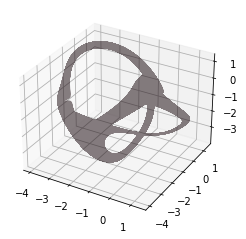

array([0.0787026 , 0.01143119, 0.02946604])

In [2]:
tr, Utr, ts, Uts = rc.train_test_orbit("thomas", duration=10000, dt=0.1, trainper=0.9)
rc.plot3d(Utr)

In [3]:
rcomp = rc.ResComp(**THOMASPRMS)
rcomp.train(tr, Utr)
pre = rcomp.predict(ts, r0=rcomp.r0)

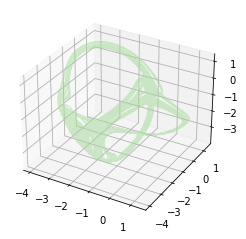

array([0.63668666, 0.85034561, 0.5973452 ])

In [4]:
rc.plot3d(pre)

In [5]:
i = rc.accduration(Uts, pre, order=2)
ts[i] - ts[0]

27.30000000000109

In [6]:
rcomp = rc.ResComp(**THOMASPRMS)
rcomp.train(tr, Utr, window=100, overlap=0.95)
pre = rcomp.predict(ts, r0=rcomp.r0)

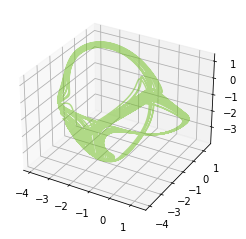

array([0.42385246, 0.74635976, 0.10230045])

In [7]:
rc.plot3d(pre)

In [8]:
i = rc.accduration(Uts, pre, order=2)
ts[i] - ts[0]

27.899999999999636

In [9]:
rc.system_fit_error(ts, pre, "thomas")

28.2952666037388

In [10]:
rc.system_fit_error(ts, Uts, "thomas")

28.660983945009303

In [11]:
trand, Urand = rc.orbit("thomas", duration=50, dt=0.1)
randpre = rcomp.predict(trand, Urand[0, :])

In [12]:
i = rc.accduration(Urand, randpre)
trand[i] - trand[0]

15.200000000000001

Old method

In [13]:
rcomp = rc.ResComp(**THOMASPRMS)
rcomp.train(tr, Utr)
pre = rcomp.predict(ts, r0=rcomp.r0)

In [14]:
trand, Urand = rc.orbit("thomas", duration=50, dt=0.1)
randpre = rcomp.predict(trand, Urand[0, :])

In [15]:
i = rc.accduration(Urand, randpre)
trand[i] - trand[0]

0.0

In [139]:
tr, Utr, ts, Uts = rc.train_test_orbit("lorenz", duration=15)
rcomp = rc.ResComp(**LORENZPRMS)
rcomp.train(tr, Utr)
r0 = rcomp.r0 + np.random.randn(rcomp.res_sz)*1e-4
pre = rcomp.predict(ts, r0=r0)


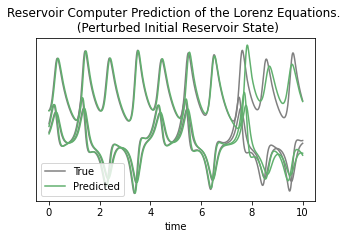

In [167]:
plt.rcParams["figure.figsize"] = [5, 3]
t = np.linspace(0, 10, len(ts))
color = np.array([0.38034327, 0.68992564, 0.43117071])
plt.plot(t, Uts, c="gray")
plt.plot(t, pre, c=color)
plt.plot(t[0], Uts[0,0], c="gray", label="True")
plt.plot(t[0], pre[0,0], c=color, label="Predicted")
plt.xlabel("time")
plt.title("Reservoir Computer Prediction of the Lorenz Equations. \n (Perturbed Initial Reservoir State)")
plt.yticks([])
plt.legend()

plt.show()

In [187]:
tr, Utr, ts, Uts = rc.train_test_orbit("lorenz", duration=20)
rcomp = rc.ResComp(**LORENZPRMS)
rcomp.train(tr, Utr)
r0 = rcomp.r0 + np.random.randn(rcomp.res_sz)*1e-4
pre = rcomp.predict(ts, r0=r0)


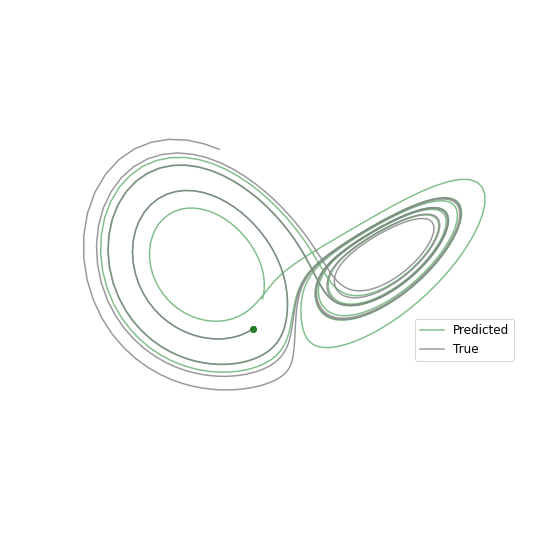

In [176]:
plt.rcParams["figure.figsize"] = [10, 10]
ax = plt.axes(projection='3d')
x,y,z = pre[:,0], pre[:, 1], pre[:, 2]
x0,y0,z0 = pre[1,0], pre[1,1], pre[1,2]
ax.plot3D(x, y, z, c=color, alpha=0.8, label="Predicted")
ax.plot3D(x0, y0, z0, 'o', c='darkgreen', alpha=0.8)
ax.plot3D(Uts[:,0], Uts[:,1], Uts[:,2], c="gray", alpha=0.8, label="True")

ax.set_title = "3D Orbit"
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
plt.title("Continued Reservoir Node State Evolution")
ax.set_axis_off()
plt.legend()
ax.legend(loc=(.75,.35), prop={"size":12})

plt.show()

In [220]:
rcomp = rc.ResComp(**LORENZPRMS)
rcomp.train(tr, Utr)
u0 = Uts[0]
pre = rcomp.predict(ts, u0)

In [199]:
color=np.random.rand(3)

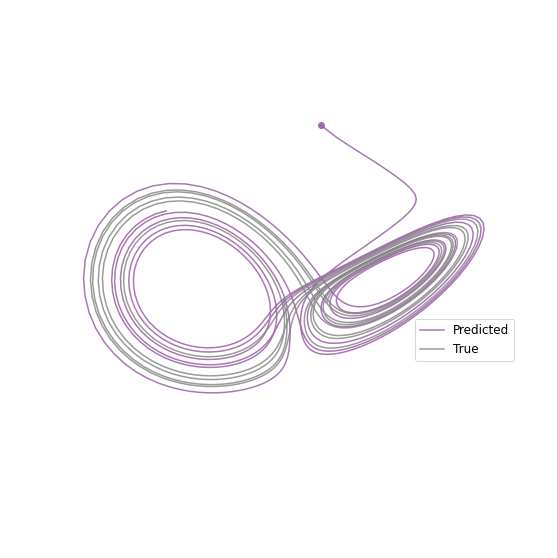

In [221]:
plt.rcParams["figure.figsize"] = [10, 10]
ax = plt.axes(projection='3d')
x,y,z = pre[:,0], pre[:, 1], pre[:, 2]
x0,y0,z0 = pre[0,0], pre[0,1], pre[0,2]
ax.plot3D(x, y, z, c=color, alpha=0.8, label="Predicted")
ax.plot3D(x0, y0, z0, 'o', c=color, alpha=0.8)
ax.plot3D(Uts[:,0], Uts[:,1], Uts[:,2], c="gray", alpha=0.8, label="True")

ax.set_title = "3D Orbit"
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
plt.legend()
ax.legend(loc=(.75,.35), prop={"size":12})
ax.set_axis_off()
plt.show()

## Activation functions

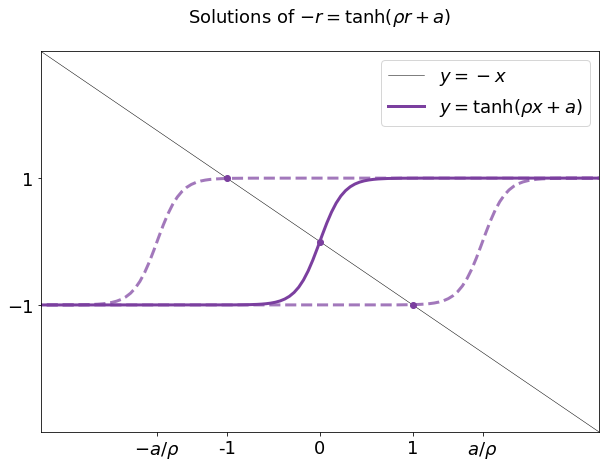

In [53]:
plt.rcParams["figure.figsize"] = [10, 7]
x = np.linspace(-5, 5, 200)
activ_f = np.tanh
f = lambda x, rho, a: activ_f(rho * x + a)
r = 4
color = np.array([0.48396212, 0.24616213, 0.6241649 ])
plt.plot(x, -1*x, c='k', lw=.5, label="$y = -x$")
plt.plot(x, f(x, r, 0), c=color, lw=3.0, label="$y = \\tanh (\\rho x + a)$")
plt.plot(x, f(x, r, -7), '--', c=color,lw=3.0, alpha=0.7)
plt.plot(x, f(x, r, 7), '--', c=color,lw=3.0, alpha=0.7)
plt.plot(-1, 1, 'o', c=color)
plt.plot(1, -1, 'o', c=color)
plt.plot(0, 0, 'o', c=color)


plt.ylim([-3, 3])
plt.xlim([-3, 3])
plt.xticks([0])
plt.yticks([-1, 1], fontsize=18)
plt.xticks([-7/4, -1, 0, 1, 7/4], ["$-a/\\rho$","-1", "0", "1", "$a/\\rho$"], fontsize=18)
plt.legend(fontsize=18)
plt.title("Solutions of $-r = \\tanh(\\rho r + a)$\n", fontsize=18)
plt.show()

In [76]:
color

array([0.05699787, 0.35150561, 0.01903816])

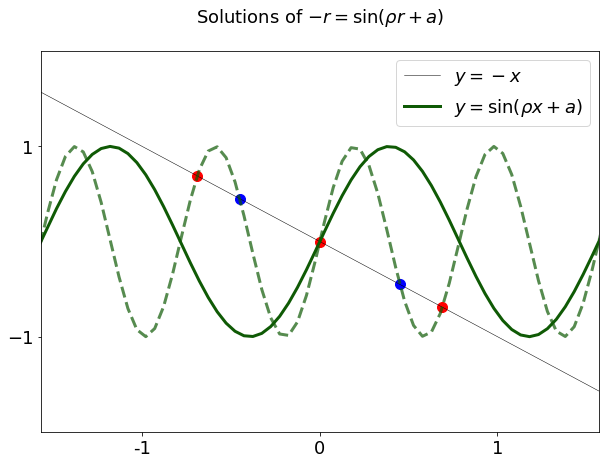

In [314]:
plt.rcParams["figure.figsize"] = [10, 7]
color=np.array([0.05699787, 0.35150561, 0.01903816])
x = np.linspace(-5, 5, 200)
activ_f = np.sin
f = lambda x, rho, a: activ_f(rho * x + a)
r = 4
bigr = 8
fastsin = lambda x: f(x, bigr, 0) + x
roots = sp.optimize.fsolve(fastsin, [-.7, -0.5, 0, 0.5,0.7])

plt.plot(x, -1*x, c='k', lw=.5, label="$y = -x$")
plt.plot(x, f(x, r, 0), c=color, lw=3.0, label="$y = \\sin (\\rho x + a)$")
plt.plot(x, f(x, bigr, 0), '--', c=color,lw=3.0, alpha=0.7)

for r0 in roots:
    if 1 - bigr*np.cos(bigr*r0) <= 0:
        color = "red"
    else:
        color = "blue"
    plt.scatter(r0, fastsin(r0) - r0, s=100.0, alpha=1.0, color=color)


plt.ylim([-2, 2])
plt.xlim([-np.pi/2, np.pi/2])
plt.xticks([0])
plt.yticks([-1, 1], fontsize=18)
plt.xticks([-1, 0, 1], ["-1", "0", "1"], fontsize=18)
plt.legend(fontsize=18)
plt.title("Solutions of $-r = \\sin(\\rho r + a)$\n", fontsize=18)
plt.show()

# Complete Graph

In [533]:
dt = 0.001
rho = 5*np.pi
A = rho * np.array([  [0, 1, 1],
                      [1, 0, 1],
                      [1, 1, 0]])
F = lambda x, t: -(x + np.sin(A@x))
y0 = 0.25*np.random.rand(3) - 0.125
t = np.arange(0, 500, dt)
U = sp.integrate.odeint(F, y0, t)

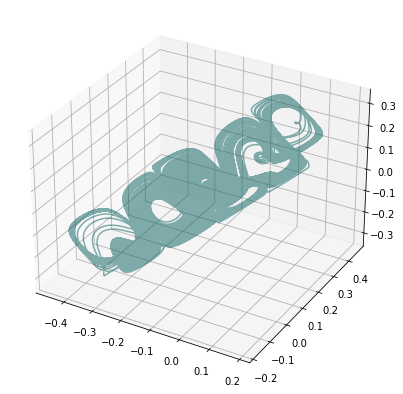

array([0.02985583, 0.37695258, 0.37807315])

In [534]:
rc.plot3d(U[10000:,:])

## Directed Loop

In [113]:
dt = 0.001
rho = 1.8*np.pi
A = rho * np.array([  [0, 0, 1],
                      [1, 0, 0],
                      [0, 1, 0]])
F = lambda x, t: -(x + np.sin(A@x))
y0 = 0.25*np.random.rand(3) - 0.125
t = np.arange(0, 500, dt)
U = sp.integrate.odeint(F, y0, t)

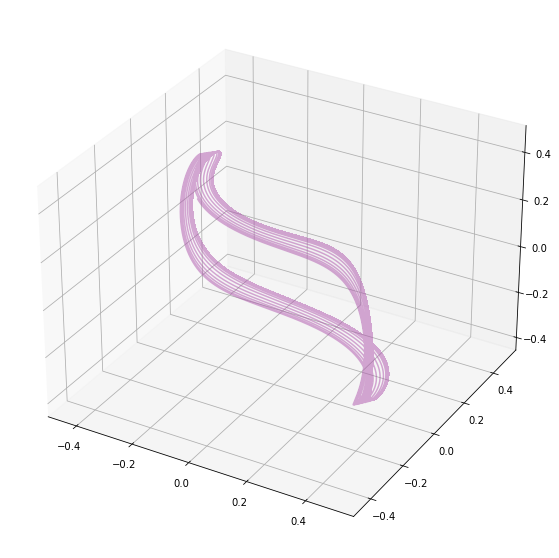

array([0.68376873, 0.3337631 , 0.67310511])

In [114]:
rc.plot3d(U[10000:,:])

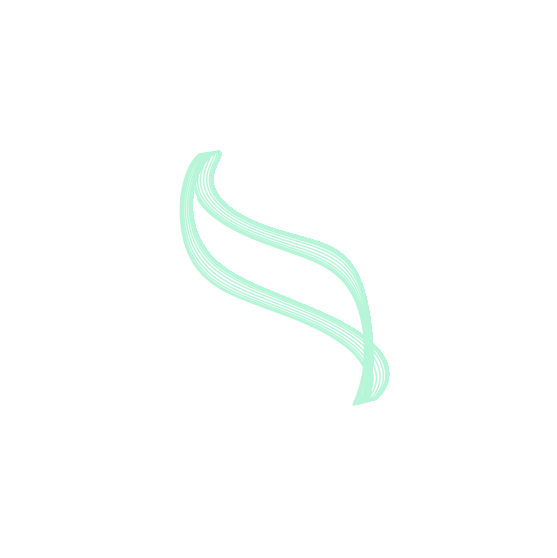

In [134]:
color = np.random.rand(3)
plt.rcParams["figure.figsize"] = [10, 10]
ax = plt.axes(projection='3d')
x,y,z = U[10000:,0], U[10000:, 1], U[10000:, 2]
ax.plot3D(x, y, z, c=color, alpha=0.3)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.set_axis_off()
plt.show()

In [105]:
dt = 0.001
rho = 3.*np.pi
A = rho * np.array([  [0, 0, 1],
                      [1, 0, 0],
                      [0, 1, 0]])
F = lambda x, t: -(x + np.sin(A@x))
y0 = 0.5*np.random.rand(3)
t = np.arange(0, 500, dt)
U = sp.integrate.odeint(F, y0, t)

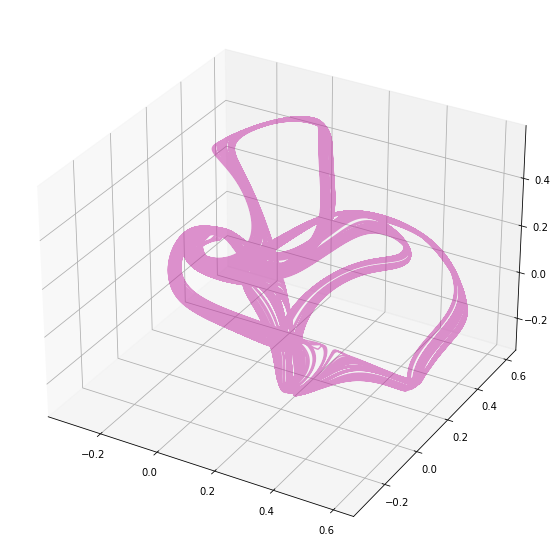

array([0.75731122, 0.16583749, 0.63271923])

In [106]:
rc.plot3d(U[10000:,:])

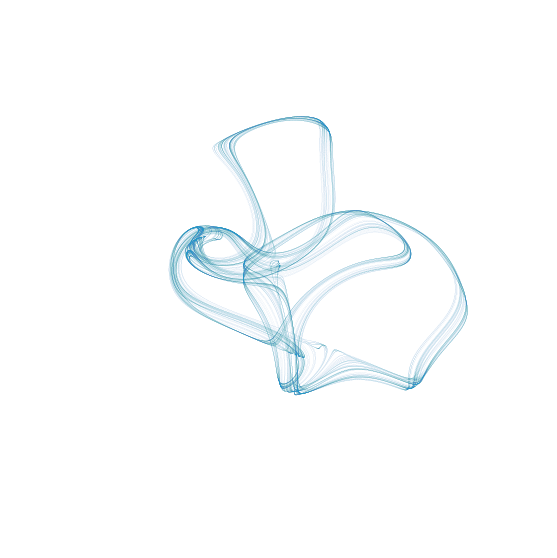

In [109]:
color = np.random.rand(3)
plt.rcParams["figure.figsize"] = [10, 10]
ax = plt.axes(projection='3d')
x,y,z = U[10000:,0], U[10000:, 1], U[10000:, 2]
ax.plot3D(x, y, z, ",", c=color, alpha=0.01)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.set_axis_off()
plt.show()

## Acyclic

In [671]:
dt = 0.001
rho = 20*np.pi
A = rho * np.array([  [1, 0, 0],
                      [1, 0, 0],
                      [0, 1, 0]])
F = lambda x, t: -(x + np.sin(A@x))
y0 = 0.5*np.random.rand(3)
t = np.arange(0, 500, dt)
U = sp.integrate.odeint(F, y0, t)

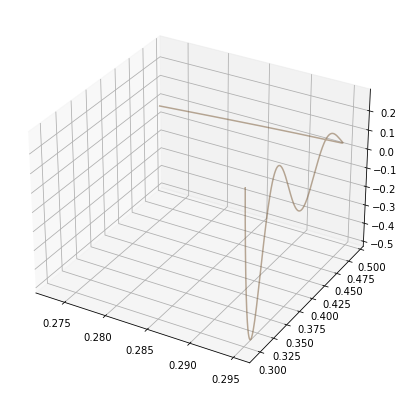

array([0.4709198 , 0.34292183, 0.19865441])

In [672]:
rc.plot3d(U[:,:])

## Loop with feedback

In [6]:
dt = 0.001
rho = 3.34*np.pi
A = rho * np.array([  [0, 1, 1],
                      [1, 0, 1],
                      [0, 1, 0]])
F = lambda x, t: -(x + np.sin(A@x))
y0 = 0.5*np.random.rand(3)
t = np.arange(0, 1000, dt)
U = sp.integrate.odeint(F, y0, t)

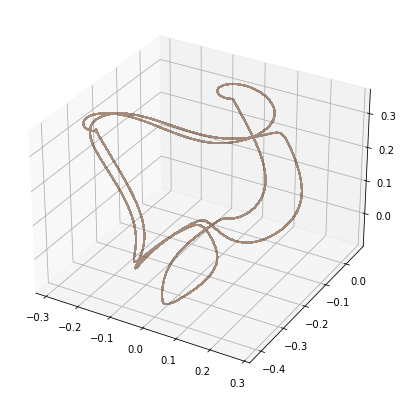

array([0.32337998, 0.13745854, 0.01557423])

In [7]:
rc.plot3d(U[10000:,:])

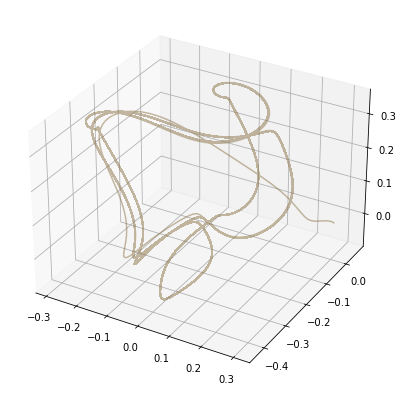

In [8]:
from mpl_toolkits.mplot3d import Axes3D
color = np.random.rand(3)
ax = plt.axes(projection='3d')
x,y,z = U[:,0], U[:, 1], U[:, 2]
ax.plot3D(x, y, z, c=color,alpha=.5)
ax.set_title = "3D Orbit"
plt.show(ax)

In [88]:
t, U = rc.orbit("rossler", duration=1000, trim=True, dt=0.1)


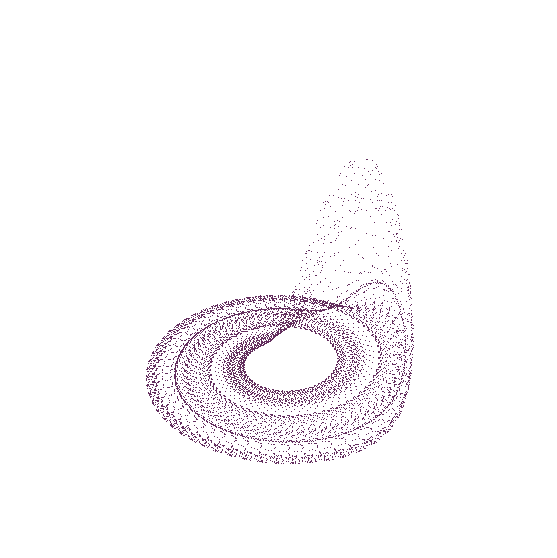

In [96]:
color = np.random.rand(3)
plt.rcParams["figure.figsize"] = [10, 10]
ax = plt.axes(projection='3d')
x,y,z = U[:,0], U[:, 1], U[:, 2]
ax.plot3D(x, y, z, ",", c=color)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.set_axis_off()
plt.show()